## Lab 1
By Alvaro Austin - 2106752180

## Soal 2.1

1. Soal 1- Image Negative and Histogram

In [20]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install scikit-image


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color as clr, io, util, filters, morphology
from skimage.filters import gabor, gaussian

### Part A

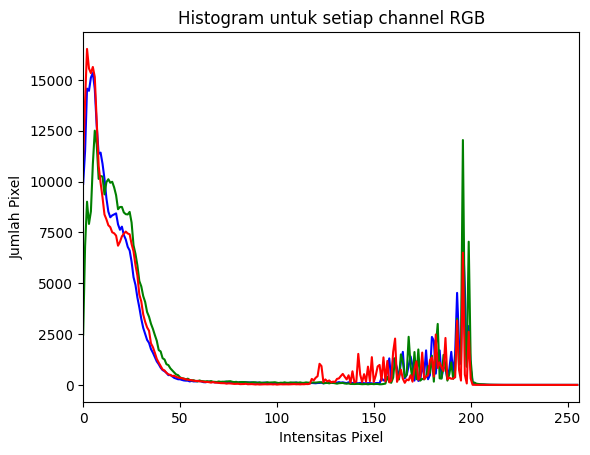

In [22]:
# Histogram

first_image = cv2.imread('Fasilkom1b.jpeg')

channels = cv2.split(first_image)
colors = ('b', 'g', 'r')
plt.figure()
plt.title('Histogram untuk setiap channel RGB')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Pixel')
 
 
for (channel, color) in zip(channels, colors):
    histogram = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.xlim([0, 256])
    
plt.show()

### Part B

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.0679727442899587].


(np.float64(-0.5), np.float64(749.5), np.float64(499.5), np.float64(-0.5))

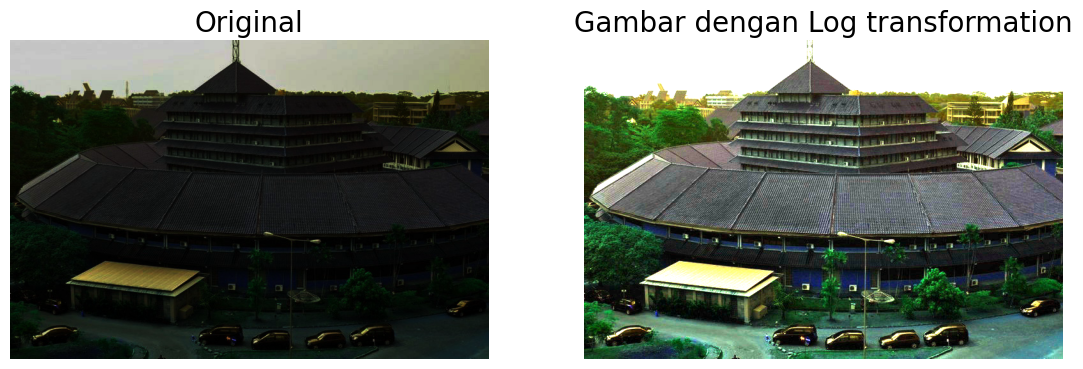

In [23]:
# Metode 1: Log Transform dengan konstanta c = 5

a = first_image/255

c = 5

l = c*np.log(1 + (a))

plt.figure(figsize=(21, 14))

plt.subplot(1,3,1); plt.imshow(first_image)
plt.title('Original', fontsize=20); plt.axis("off")

plt.subplot(1,3,2); plt.imshow(l)
plt.title('Gambar dengan Log transformation', fontsize=20); plt.axis("off")


Kelebihan dari Log transformation:
- Fokus pada mencerahkan area gelap dengan kontras rendah karena fungsi logaritma mengkompresi rentang intensitas pada area terang sambil memperluas rentang pada area gelap.
- Menjaga detail di area gelap karena log transformation dapat membantu menonjolkan rincian atau detail yang mungkin tersembunyi di area gelap gambar.
- Mengurangi efek sorotan karena kompresi nilai yang lebih tinggi di area terang, teknik ini dapat membantu mengurangi efek sorotan atau pencahayaan berlebih di area yang sangat terang.

Kekurangan: 
- Tidak efektif untuk area yang sudah terang karena logaritma secara alami memperlambat perubahan intensitas di area yang terang.
- Berpotensi hilangnya detail pada area yang terang karena kompresi intensitas di area terang, detail halus pada area ini dapat hilang.
- Menghasilkan gambar dengan efek kontras rendah karena distribusi intensitas yang berubah secara tidak linier.

(np.float64(-0.5), np.float64(749.5), np.float64(499.5), np.float64(-0.5))

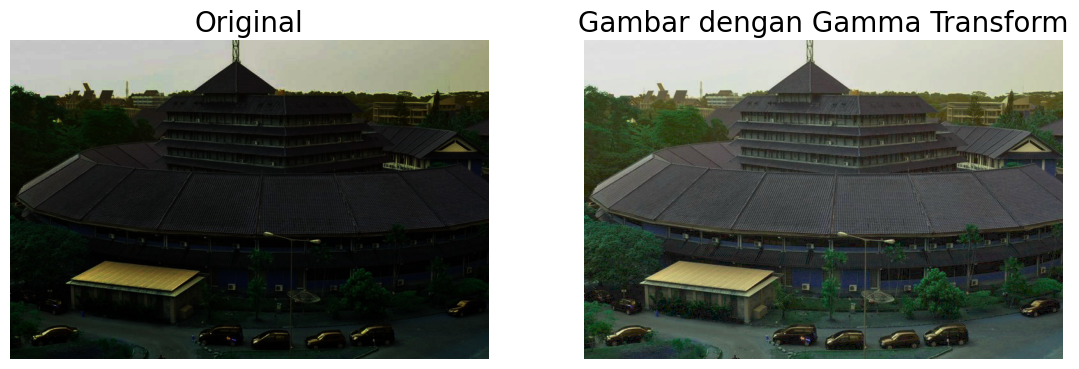

In [24]:
# Metode 2: Gamma Transformation, p = 0.5

a = first_image/255

p = 0.5

g = (a**p)

plt.figure(figsize=(21, 14))

plt.subplot(1,3,1); plt.imshow(first_image)
plt.title('Original', fontsize=20); plt.axis("off")

plt.subplot(1,3,2); plt.imshow(g)
plt.title('Gambar dengan Gamma Transform', fontsize=20); plt.axis("off")


Kelebihan: 
- Mengatur tingkat kecerahan secara bertahap, transformasi ini mengubah kecerahan secara halus tanpa mengubah kontras secara drastis, cocok untuk situasi di mana peningkatan bertahap lebih diinginkan.
- Kontrol fleksibel atas kecerahan, dengan memilih nilai gamma yang lebih kecil dari 1, gambar akan lebih terang, dan dengan nilai gamma yang lebih besar dari 1, gambar akan lebih gelap.
- Cocok untuk berbagai jenis gambar dikarenakan fleksibilitas nilai gamma, transformasi ini dapat disesuaikan untuk berbagai jenis gambar dengan kondisi pencahayaan yang berbeda.

Kekurangan: 
- Kesulitan menentukan nilai gamma yang tepat dapat menjadi tantangan, karena nilai yang terlalu kecil atau terlalu besar dapat menghasilkan gambar yang terlalu terang atau terlalu gelap.
- Potensi Overexposure atau Underexposure karena apabila nilai gamma tidak dipilih dengan hati-hati, teknik ini dapat menyebabkan overexposure (terlalu terang) atau underexposure (terlalu gelap) pada gambar.
- Gamma transformation lebih berfokus pada perubahan kecerahan secara keseluruhan, dan mungkin tidak mengoptimalkan kontras pada gambar.

(np.float64(-0.5), np.float64(749.5), np.float64(499.5), np.float64(-0.5))

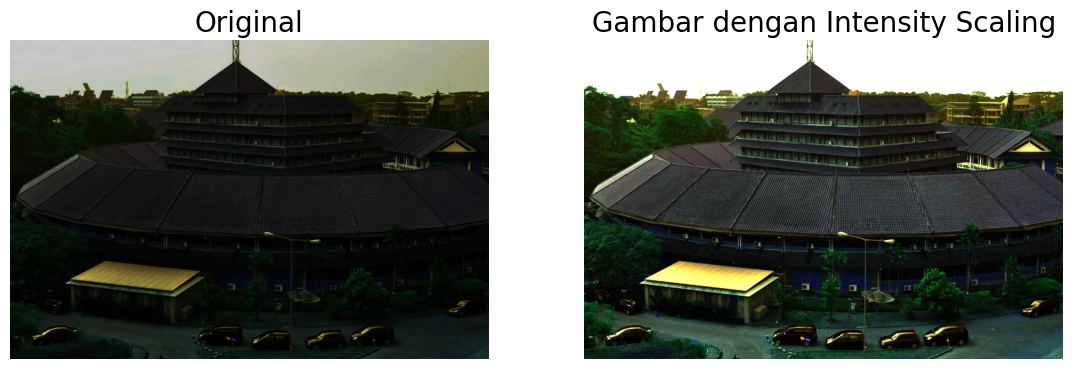

In [25]:
# Metode 5: Intensity Scaling (Linear Brightening)
scale_factor = 2.5

brightened_image = np.clip(first_image * scale_factor, 0, 255).astype(np.uint8)

plt.figure(figsize=(21, 14))

plt.subplot(1, 3, 1); plt.imshow(first_image)
plt.title('Original', fontsize=20); plt.axis("off")

plt.subplot(1, 3, 2); plt.imshow(brightened_image)
plt.title('Gambar dengan Intensity Scaling', fontsize=20); plt.axis("off")

Kelebihan dari Intensity Scaling:

- Implementasi yang sederhana dan cepat karena sangat mudah untuk mengganti skala intensitas

- Memiliki kontrol yang fleksibel dalam mengubah intensitas

Kekurangan dari Intensity Scaling:

- Potensi overexposure, apabila faktor skala terlalu besar, beberapa piksel akan mencapai nilai maksimum (255) dan menyebabkan hilangnya detail pada area yang terang.

- Peningkatan noise, apabila citra asli memiliki noise, noise tersebut juga akan diperbesar dengan teknik ini.

- Tidak mengoptimalkan kontras, teknik yang hanya fokus pada peningkatan kecerahan dan tidak mengoptimalkan kontras secara otomatis.

## Soal 2.2

### Bagian A

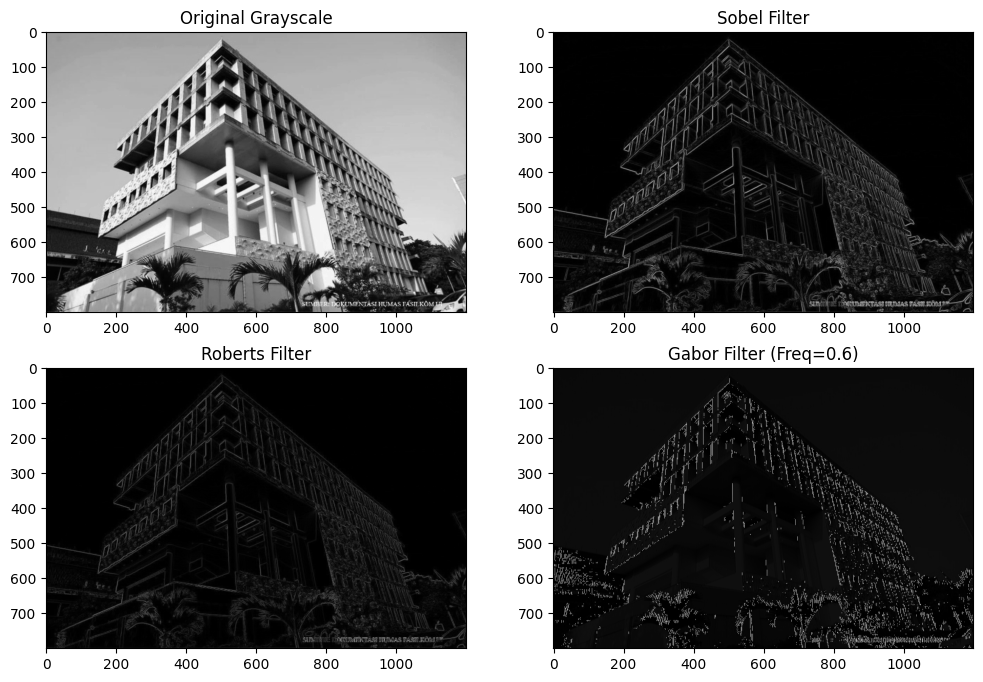

In [26]:
second_image_greyed = util.img_as_ubyte(clr.rgb2gray(io.imread('./fasilkomuidepok.jpg')))

sobel_result = filters.sobel(second_image_greyed)
roberts_result = filters.roberts(second_image_greyed)
gabor_result, _ = gabor(second_image_greyed, frequency=0.6)


plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1), plt.imshow(second_image_greyed, cmap='gray'), plt.title('Original Grayscale')
plt.subplot(2, 2, 2), plt.imshow(sobel_result, cmap='gray'), plt.title('Sobel Filter')
plt.subplot(2, 2, 3), plt.imshow(roberts_result, cmap='gray'), plt.title('Roberts Filter')
plt.subplot(2, 2, 4), plt.imshow(gabor_result, cmap='gray'), plt.title('Gabor Filter (Freq=0.6)')
plt.show()

Apa perbedaan yang dihasilkan oleh masing-masing edge detection?

- Sobel Filter
    - Sobel filter mendeteksi tepi dengan menghitung gradien intensitas piksel di sepanjang sumbu X dan Y. Pada gambar, Sobel filter menunjukkan tepi yang kuat dan halus, terutama di bagian struktur bangunan. Metode ini baik untuk mendeteksi tepi horizontal dan vertikal, seperti sudut-sudut dan garis-garis bangunan.
- Roberts Filter
    - Roberts filter menggunakan dua kernel 2x2 untuk mendeteksi perubahan intensitas piksel di arah diagonal. Roberts filter menghasilkan tepi yang lebih tajam dan lebih tipis dibandingkan Sobel, tetapi lebih sensitif terhadap noise. Gambar menunjukkan tepi yang jelas di bagian sudut dan garis diagonal, tetapi dengan intensitas yang lebih rendah dibandingkan Sobel. Metode ini dapat memberikan hasil yang lebih baik pada gambar dengan tepi diagonal yang jelas.
- Gabor Filter
    - Gabor filter adalah filter berbasis frekuensi yang mempertimbangkan orientasi dan frekuensi spasial tertentu. Gambar dengan Gabor filter menunjukkan hasil yang lebih teredam dibandingkan dengan Sobel dan Roberts. Pada gambar ini, filter Gabor tidak dapat memperlihatkan tepi yang jelas seperti Sobel dan Roberts, tetapi lebih fokus pada tekstur dan pola pada gambar. Metode ini cocok untuk mendeteksi tekstur dan pola pada gambar, seperti tekstur pada dinding dan atap bangunan.

### Bagian B

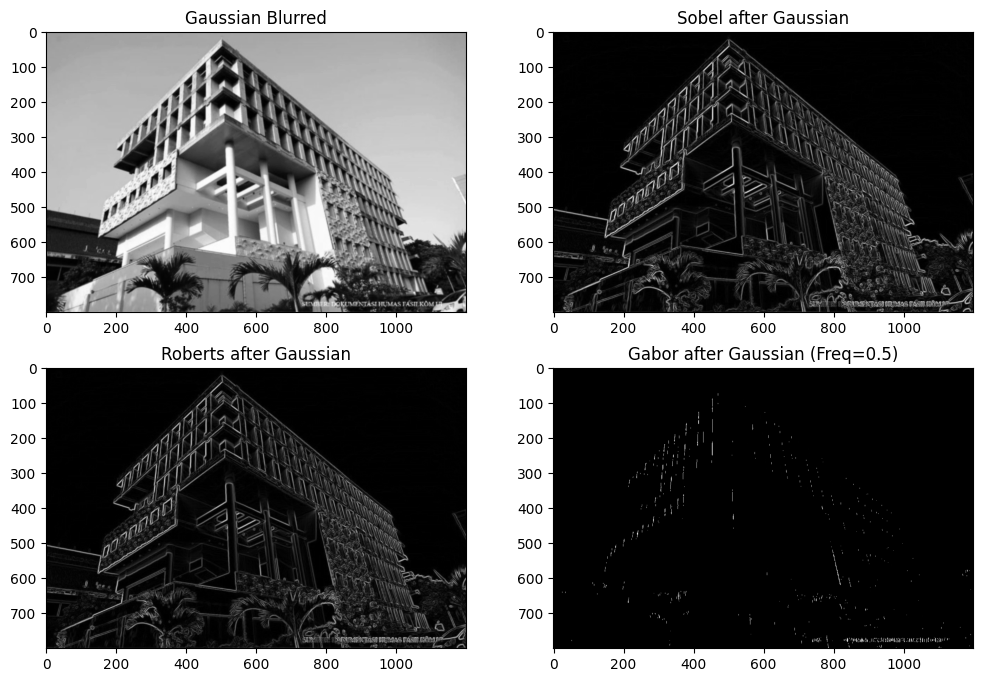

In [27]:
gaussian_blur = util.img_as_ubyte(gaussian(second_image_greyed, sigma=1))

sobel_result_blur = filters.sobel(gaussian_blur)

roberts_result_blur = filters.roberts(gaussian_blur)

gabor_result_blur, _ = gabor(gaussian_blur, frequency=0.5)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1), plt.imshow(gaussian_blur, cmap='gray'), plt.title('Gaussian Blurred')
plt.subplot(2, 2, 2), plt.imshow(sobel_result_blur, cmap='gray'), plt.title('Sobel after Gaussian')
plt.subplot(2, 2, 3), plt.imshow(roberts_result_blur, cmap='gray'), plt.title('Roberts after Gaussian')
plt.subplot(2, 2, 4), plt.imshow(gabor_result_blur, cmap='gray'), plt.title('Gabor after Gaussian (Freq=0.5)')
plt.show()

### Bagian C

#### Perbedaan antara hasil di B

Kemiripan:

Hasil dari metode Sobel dan Roberts menunjukkan kemiripan karena keduanya mendeteksi tepi dengan cara yang relatif mirip, yaitu mendeteksi perubahan intensitas dalam arah tertentu (Sobel lebih sensitif terhadap tepi horizontal dan vertikal, sedangkan Roberts lebih sederhana dan sensitif terhadap perbedaan lokal). Keduanya menunjukkan tepi pada bagian bangunan dan garis-garis struktural dengan cukup jelas, terutama pada bagian-bagian tepi tajam bangunan yang kontras dengan latar belakang.

Sobel dan Roberts menghasilkan hasil yang mirip karena keduanya adalah operator deteksi tepi berbasis perbedaan intensitas di gambar. Sobel menggabungkan smoothing dengan deteksi tepi, yang mirip dengan efek Roberts tetapi dengan lebih banyak bobot terhadap tepi di dua arah (horizontal dan vertikal).

Perbedaan:

Hasil deteksi tepi setelah penggunaan filter Gabor sangat berbeda dari Sobel dan Roberts. Gabor digunakan untuk mendeteksi frekuensi dan orientasi tertentu dalam gambar. Karena parameter frekuensi diatur ke 0,5, hasil ini hanya menangkap sedikit detail, dan terutama lebih selektif dalam mendeteksi pola atau tekstur yang sesuai dengan frekuensi tersebut. Inilah yang membuatnya tampak lebih "bercelah" atau tidak menampilkan semua tepi secara jelas.

Filter Gabor secara signifikan berbeda karena ia mendeteksi orientasi dan frekuensi spesifik. Hal ini menyebabkan Gabor lebih selektif, mendeteksi hanya pola yang sesuai dengan parameter frekuensi yang ditentukan. Sedangkan Sobel dan Roberts hanya mendeteksi perubahan intensitas tanpa memperhitungkan frekuensi atau orientasi tertentu.

#### Perbedaan antara hasil A dan B
Kemiripan yang terjadi:

Sobel Before & After Gaussian:
> Hasil Sobel menunjukkan tepi yang lebih halus dibandingkan dengan hasil tanpa Gaussian filtering. Gaussian filtering berfungsi mengurangi noise dengan mengaburkan gambar sedikit sebelum melakukan edge detection. Sobel merupakan filter untuk mendeteksi tepi berdasarkan perubahan intensitas piksel, sehingga Gaussian blur memperhalus hasil yang didapat dari filter tersebut. Gaussian blur mengurangi noise, sehingga hasil Sobel lebih halus. Akan tetapi pada gambar, hasil Sobel sebelum dan sesudah Gaussian filtering menunjukkan hasil yang mirip, dengan tepi yang halus dan jelas.

Perbedaan:

Roberts Before & After Gaussian:
> Hasil Roberts menunjukkan tepi yang lebih tajam dibandingkan dengan hasil tanpa Gaussian filtering. Gaussian filtering berfungsi mengurangi noise dengan mengaburkan gambar sedikit sebelum melakukan edge detection. Roberts merupakan filter untuk mendeteksi tepi berdasarkan perubahan intensitas piksel, sehingga Gaussian blur memperhalus hasil yang didapat dari filter tersebut. Gaussian blur mengurangi noise, sehingga hasil Roberts lebih halus. Akan tetapi pada gambar, hasil Roberts sebelum dan sesudah Gaussian filtering menunjukkan perbedaan yang signifikan, dengan tepi yang lebih tajam dan jelas pada hasil sebelum Gaussian filtering. Hal ini disebabkan karena Roberts filter lebih sensitif terhadap noise, sehingga Gaussian blur mengurangi detail halus pada hasil Roberts.

> Sehingga Roberts setelah Gaussian blur sudah cukup mirip dengan Sobel Before & After Gaussian.


Gabot Before & After Gaussian:
> Gabor filter setelah Gaussian menghasilkan gambar yang lebih halus dan kurang menonjol dalam mendeteksi tepi. Tepi-tepi yang terdeteksi tidak setajam hasil dari Sobel atau Roberts. Hasil ini terlihat lebih kabur dengan intensitas rendah. Penyebab pebedaan ini adalah Gaussian filter yang mengaburkan gambar sebelum edge detection, sehingga hasil dari Gabor filter menjadi lebih halus dan kurang tajam. Gabor filter lebih fokus pada tekstur dan pola pada gambar, sehingga hasil yang lebih halus dapat membantu menonjolkan tekstur dan pola pada gambar. Akan tetapi pada gambar, setelah Gaussian blur diterapkan, yang mengurangi detail halus dan noise, Gabor filter pada frekuensi 0.5 tidak mampu mendeteksi tepi dengan baik pada struktur bangunan.

Menurut saya, perbedaan yang paling signifikan adalah Roberts Before & After Gaussian

### Bagian D

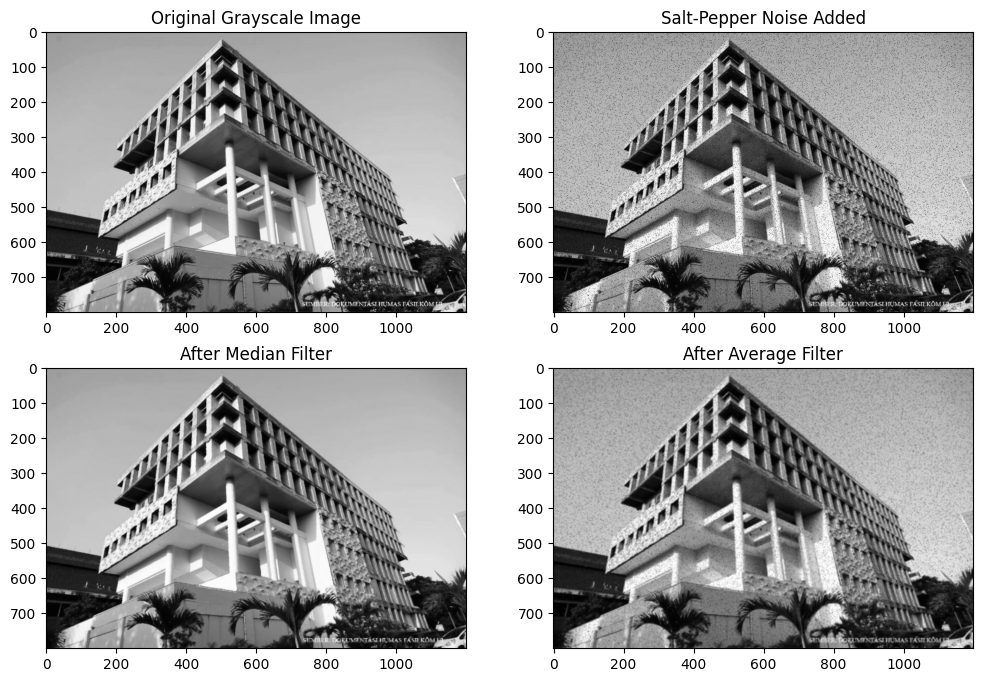

In [28]:
noise = util.img_as_ubyte(util.random_noise(second_image_greyed, mode='s&p', salt_vs_pepper=0.02))

f_median = filters.rank.median(noise, footprint = morphology.square(4))
f_average = filters.rank.mean(noise,footprint=morphology.square(4))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(second_image_greyed, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(2, 2, 2)
plt.imshow(noise, cmap='gray')
plt.title('Salt-Pepper Noise Added')

plt.subplot(2, 2, 3)
plt.imshow(f_median, cmap='gray')
plt.title('After Median Filter')

plt.subplot(2, 2, 4)
plt.imshow(f_average, cmap='gray')
plt.title('After Average Filter')

plt.show()

### Bagian E

- Median Filter: 
    - Lebih efektif dalam menghilangkan salt-pepper noise karena bekerja dengan cara mengganti setiap piksel dengan median dari nilai tetangganya. Proses ini sangat efektif untuk menghilangkan noise tipe impuls (salt-pepper) tanpa mengaburkan tepi citra. Median filter mempertahankan detail yang penting (seperti tepi) sambil menghilangkan noise yang terdiri dari outlier (salt and pepper).

- Average Filter: 
    - Kurang efektif untuk salt-pepper noise karena menggunakan rata-rata dari piksel tetangga. Ini menyebabkan noise tetap ada di citra, meskipun mungkin sedikit berkurang. Selain itu, average filter dapat mengaburkan citra secara keseluruhan, termasuk detail dan tepi.

Oleh karena itu median Filter lebih efektif dibandingkan Average Filter untuk menghilangkan salt-pepper noise. Hal ini disebabkan oleh cara kerja median filter yang mampu menghapus outlier noise (salt-pepper) tanpa mengaburkan tepi dan detail citra. Sedangkan average Filter cenderung membuat citra menjadi kabur dan tidak seefektif dalam mengatasi noise tipe impuls (salt-pepper).

## Soal 3

### Bagian A

<function matplotlib.pyplot.imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'>

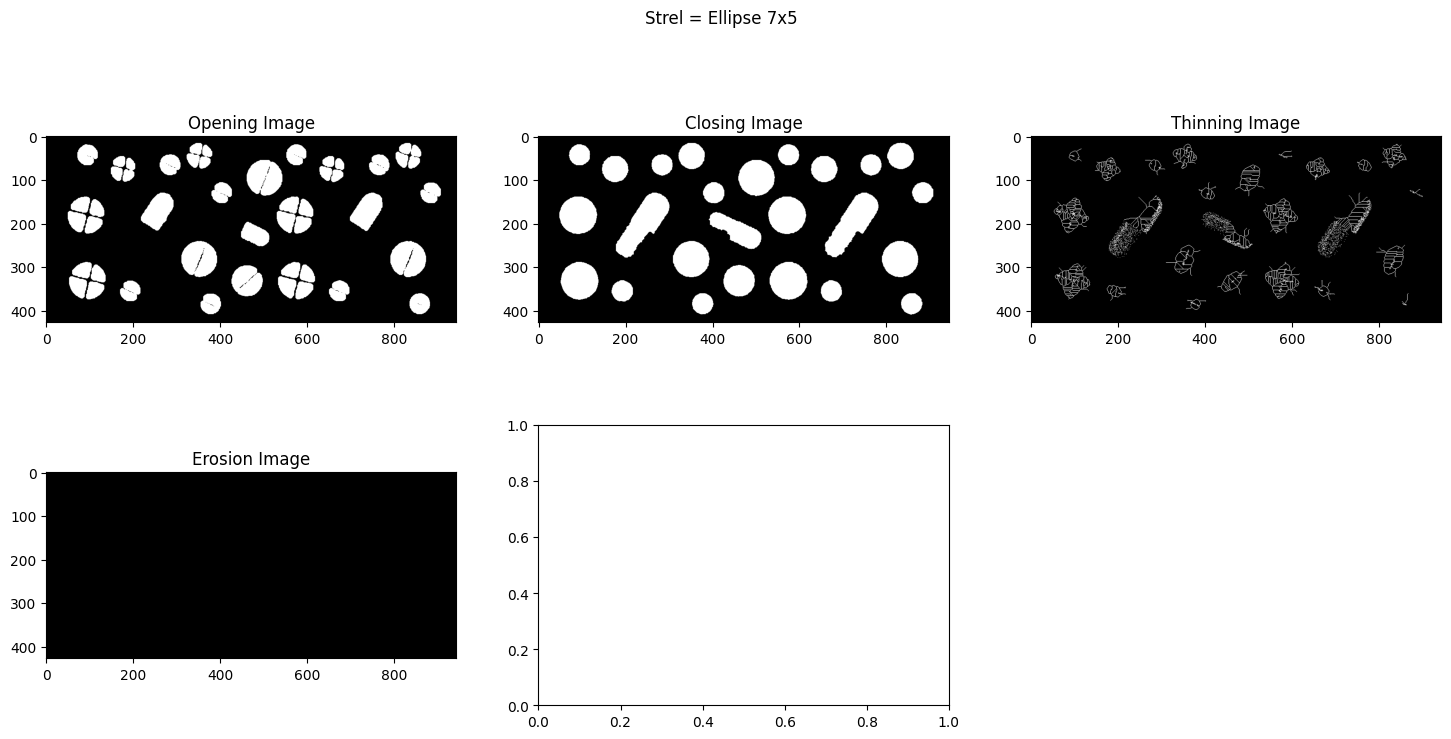

In [29]:
# Menggunakan elipsis

# Pakai elipsis

import cv2
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage import morphology

# Load and process the image
third_image = cv2.imread(r"./pills3.jpg")
third_image_greyed = cv2.cvtColor(third_image, cv2.COLOR_BGR2GRAY)

# Apply Otsu threshold
thresh_val = threshold_otsu(third_image_greyed)
binary_img = third_image_greyed > thresh_val

# Define elliptical structuring element dimensions
ellipse_width = 7  # Change the width of the ellipse
ellipse_height = 5  # Change the height of the ellipse

# Morphological operations with elliptical structuring element
dilation_image = morphology.dilation(binary_img, morphology.ellipse(ellipse_height, ellipse_width))
opening_image = morphology.opening(binary_img, morphology.ellipse(ellipse_height, ellipse_width))
closing_image = morphology.closing(binary_img, morphology.ellipse(ellipse_height, ellipse_width))
thinning_image = morphology.thin(binary_img)
erosion_image = morphology.erosion(binary_img, morphology.ellipse(ellipse_height, ellipse_width))

# Visualization
plt.figure(figsize=(18, 8))
plt.suptitle(f'Strel = Ellipse {ellipse_width}x{ellipse_height}')

plt.subplot(2, 3, 1)
plt.imshow(opening_image, cmap='gray')
plt.title('Opening Image')

plt.subplot(2, 3, 2)
plt.imshow(closing_image, cmap='gray')
plt.title('Closing Image')

plt.subplot(2, 3, 3)
plt.imshow(thinning_image, cmap='gray')
plt.title('Thinning Image')

plt.subplot(2, 3, 4)
plt.imshow(erosion_image, cmap='gray')
plt.title('Erosion Image')

plt.subplot(2, 3, 5)
plt.imshow

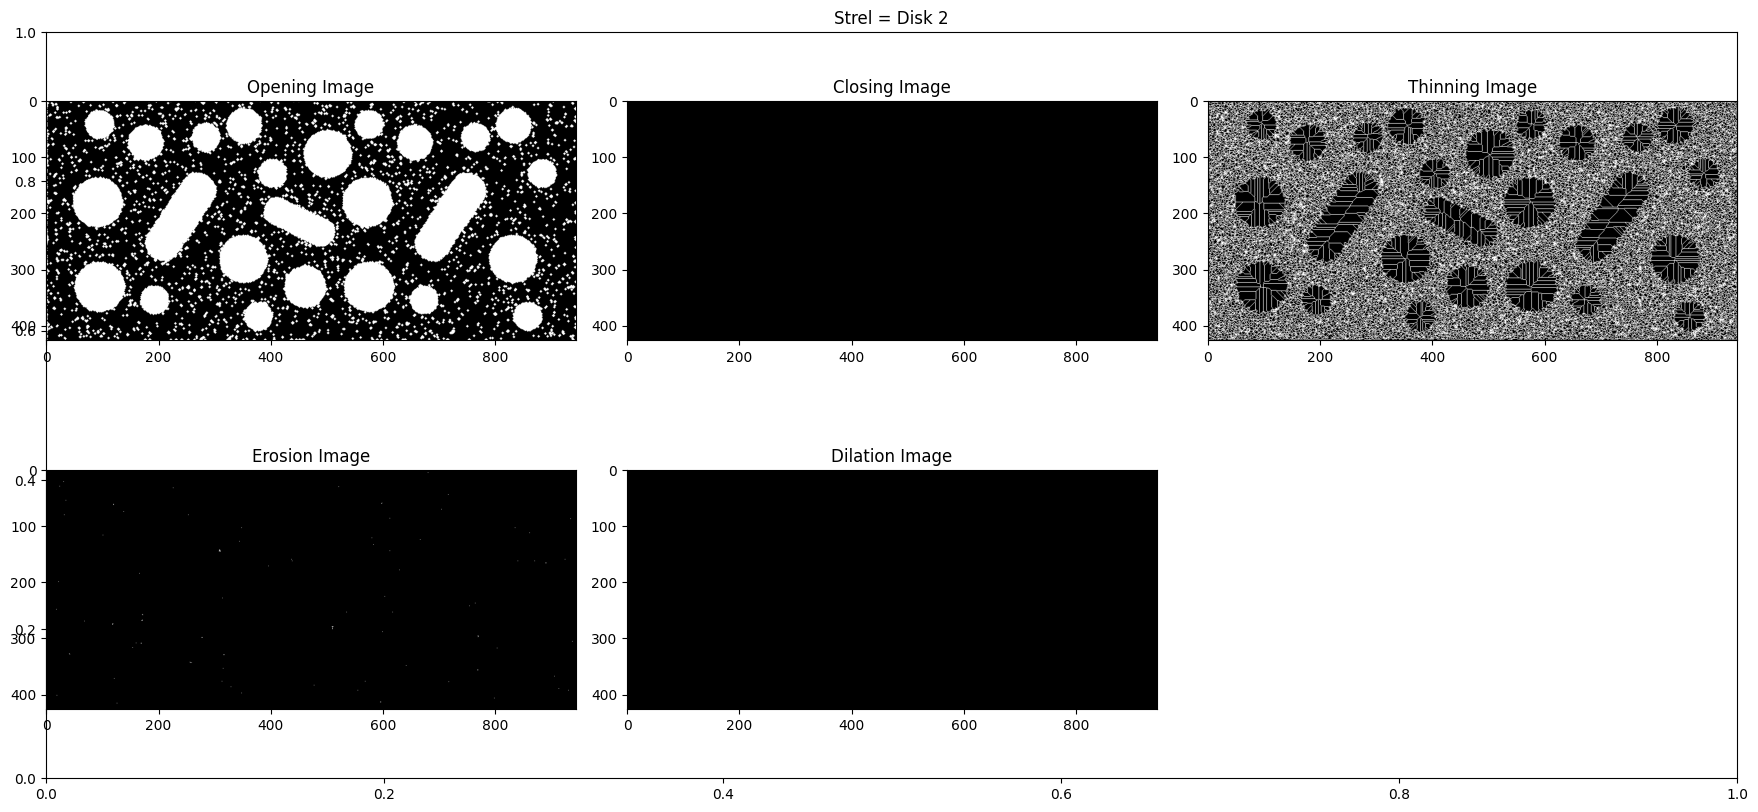

In [30]:
from skimage.filters import threshold_otsu

third_image = cv2.imread(r"./pills3.jpg")
third_image_greyed = cv2.cvtColor(third_image, cv2.COLOR_BGR2GRAY)

thresh_val = 10
binary_img = third_image_greyed > thresh_val

disk_size = 2
# Operasi Morfologi
dilation_image = morphology.dilation(binary_img, morphology.disk(disk_size))
opening_image = morphology.opening(binary_img, morphology.disk(disk_size))
closing_image = morphology.closing(binary_img, morphology.disk(disk_size))
thinning_image = morphology.thin(binary_img)
erosion_image = morphology.erosion(binary_img, morphology.disk(disk_size))

plt.figure(figsize=(18, 8))
plt.title(f'Strel = Disk {disk_size}')

plt.subplot(2, 3, 1)
plt.imshow(opening_image, cmap='gray')
plt.title('Opening Image')

plt.subplot(2, 3, 2)
plt.imshow(closing_image, cmap='gray')
plt.title('Closing Image')

plt.subplot(2, 3, 3)
plt.imshow(thinning_image, cmap='gray')
plt.title('Thinning Image')

plt.subplot(2, 3, 4)
plt.imshow(erosion_image, cmap='gray')
plt.title('Erosion Image')

plt.subplot(2, 3, 5)
plt.imshow(dilation_image, cmap='gray')
plt.title('Dilation Image')

plt.tight_layout()
plt.show()

Dapat dilihat apabila kita menggunakan gambar asli, terdapat 25 gambar yang berasal dari gambar asli. Oleh karena itu, dari 5 cara yang diatas, mari kita hitung masing-masing connected component yang dimiliki.

In [31]:
from skimage.measure import label

# Closing Image
min_size = 1000
filtered_binary_img = morphology.remove_small_objects(closing_image, min_size=min_size)

labeled_image_filtered, num_objects_filtered = label(filtered_binary_img, return_num=True)
print(f"Number of connected components after closing image filtering: {num_objects_filtered}")

# Thinning Image
filtered_binary_img = morphology.remove_small_objects(thinning_image, min_size=min_size)

labeled_image_filtered, num_objects_filtered = label(filtered_binary_img, return_num=True)
print(f"Number of connected components after thinning image filtering: {num_objects_filtered}")

# Erosion Image
filtered_binary_img = morphology.remove_small_objects(erosion_image, min_size=min_size)

labeled_image_filtered, num_objects_filtered = label(filtered_binary_img, return_num=True)
print(f"Number of connected components after erosion image filtering: {num_objects_filtered}")

# Dilation Image
filtered_binary_img = morphology.remove_small_objects(dilation_image, min_size=min_size)

labeled_image_filtered, num_objects_filtered = label(filtered_binary_img, return_num=True)
print(f"Number of connected components after dilation image filtering: {num_objects_filtered}")

# Opening Image
filtered_binary_img = morphology.remove_small_objects(opening_image, min_size=min_size)

labeled_image_filtered, num_objects_filtered = label(filtered_binary_img, return_num=True)
print(f"Number of connected components after opening image filtering: {num_objects_filtered}")


Number of connected components after closing image filtering: 1
Number of connected components after thinning image filtering: 0
Number of connected components after erosion image filtering: 0
Number of connected components after dilation image filtering: 1
Number of connected components after opening image filtering: 25


Dari hasil diatas dapat dilihat bahwa closing dan dilation memberikan data yang terbaik, Saya memilih closing karena lebih sedikit noise yang dihasilkan. Tidak hanya itu, closing merupakan operasi dilasi + erosi. Operasi ini berguna untuk menutup celah-celah kecil atau lubang pada objek. Maka secara keseluruhan closing lebih baik.


Selanjutnya saya juga menggunakan STREL berupa disk karena apabilan menggunakan disk, akan lebih baik dalam menutup celah-celah kecil pada objek.

### Bagian B

In [32]:
from skimage.measure import label, regionprops

min_size = 1000
filtered_binary_img = morphology.remove_small_objects(closing_image, min_size=min_size)

labeled_image_filtered, num_objects_filtered = label(filtered_binary_img, return_num=True)
print(f"Number of connected components after filtering: {num_objects_filtered}")


Number of connected components after filtering: 1


### Bagian C

In [33]:
regions = regionprops(labeled_image_filtered)

num_pills = 0
num_tablets = 0

for region in regions:
    eccentricity = region.eccentricity
    if eccentricity > 0.5:
        num_pills += 1 
    else:
        num_tablets += 1

print(f"Jumlah pip: {num_pills}")
print(f"Jumlah table: {num_tablets}")

Jumlah pip: 1
Jumlah table: 0
